In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fmin_tnc


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
import os
os.listdir()

['.ipynb_checkpoints', 'Admission.csv', 'Logistic Regression.ipynb']

# Importing data and intializing X ,y values

In [4]:
data = pd.read_csv('Admission.csv',names=['marks1','marks2','admission'])

In [5]:
data.head()

,marks1,marks2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = np.array(data[['marks1','marks2']])   

In [7]:
print(X.shape)

(100, 2)


In [8]:
print(X[:5,:])   #printing 5 rows of matrix X

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


In [9]:
X = np.c_[np.ones((100,1)),X]   #adding new column of 1

In [10]:
X.shape

(100, 3)

In [11]:
print(X[:5,:])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]


In [12]:
y = np.array(data[['admission']])

In [13]:
y.shape


(100, 1)

# Plotting data

In [14]:
pos = data.loc[data.admission==1]
neg = data.loc[data.admission==0]

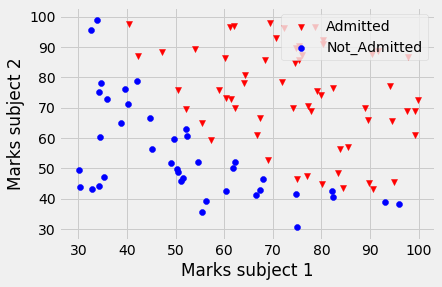

In [15]:
plt.scatter(pos.iloc[:,0],pos.iloc[:,1],c='r',marker='v',label='Admitted')
plt.scatter(neg.iloc[:,0],neg.iloc[:,1],c='b',marker='o',label = 'Not_Admitted')
plt.xlabel('Marks subject 1')
plt.ylabel('Marks subject 2')
plt.legend(loc = 'upper right')


# Functions

In [16]:
def hypothesis(x,theta):
    hx = 1/(1+np.exp(-1*(x.dot(theta))))
    return(hx)

In [17]:
def computecost(theta,x,y):  #costfunction
    m , n = x.shape
    hx = hypothesis(x,theta.reshape((n,1)))
    cost = (-1/m)*(np.sum((y*np.log(hx)) + ( (1-y) * (np.log(1-hx)) ) )) 
    return(cost)
m,n = X.shape
Theta = np.zeros((n,1))
computecost(Theta,X,y)

0.6931471805599453

In [18]:
#with for loop
def gradientdescent(x,y,theta,alpha,num_iter,m,n):
    j_hist = np.zeros((num_iter,1))
    #t_hist = np.zeros((num_iter,n))
    for i in range(num_iter):
        hx = hypothesis(x,theta)
        theta = theta - alpha * (1/m)* (  np.dot(x.T,( hx - y)) ) 
        j_hist[i] = computecost(theta,x,y)
        #t_hist[i,:]  = theta.T

        return (theta,j_hist)

In [19]:
#complete vectorized 
def gradient(theta,x,y):
    m,n = x.shape
    hx = hypothesis(x,theta.reshape((n,1)))
    grad = 1.0 / m * ((hx - y).T.dot(x))
    return (grad)
gradient(Theta,X,y) #initial 

array([[ -0.1       , -12.00921659, -11.26284221]])

# Main function

In [20]:
# main function
#initialize theta and alpha
m = len(X)
n = len(X[0])
theta = np.zeros(n)    #1-D vector (n,)
alpha = 0.001
num_iter = 2000000

# Using optimizing function (fmin_tnc)

In [21]:
# In the optimizing function the theta should be passed as 1-d vector


import scipy.optimize as opt
thetaf , nf ,rc  = opt.fmin_tnc(func=computecost, x0=theta ,fprime=gradient,args=(X,y))

print(thetaf)

[-25.16131863   0.20623159   0.20147149]


# Using the number of iteration in gradient descent

In [22]:
theta , j_hist  = gradientdescent(X,y,theta.reshape((n,1)),alpha,num_iter,m,n)

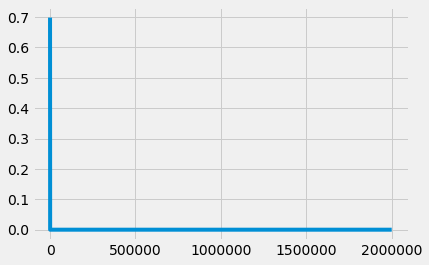

In [23]:
plt.plot(range(num_iter),j_hist)

In [24]:
print(theta)

[[0.0001    ]
 [0.01200922]
 [0.01126284]]


## For a student with scores 45 and 85, we predict an admission probability of 0.77629062453

In [26]:
print(hypothesis(np.array([1,45,85]).reshape(1,3),thetaf))

[0.77629062]


# Plotting Decision Boundary

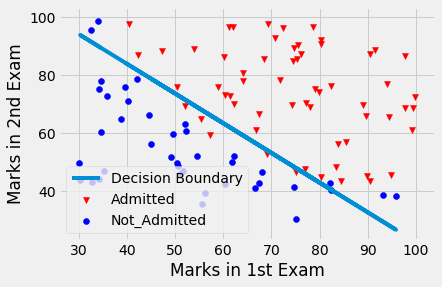

In [27]:
x_values = X[0:15,1]
y_values = - (thetaf[0] + thetaf[1]* x_values) / thetaf[2]

#x2 = (theta[0] + x1*theta[1])/theta[2]


plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(pos.iloc[:,0],pos.iloc[:,1],c='r',marker='v',label='Admitted')
plt.scatter(neg.iloc[:,0],neg.iloc[:,1],c='b',marker='o',label = 'Not_Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

In [28]:
x_values

array([34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
       45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
       95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914])

In [29]:
y_values

array([89.44603845, 93.88545501, 88.19337618, 63.2832258 , 43.98772299,
       78.73929456, 62.33732806, 48.09040898, 46.99099182, 38.46005302,
       26.76129484, 48.10175811, 40.63604442, 53.8842965 , 84.41524137])

# Predict and Accuracies 

In [31]:
hx = hypothesis(X,theta)
threshold = 0.5
prediction = np.select([hx>=threshold,hx<threshold],[1,0])

In [32]:
accuracy = np.mean(prediction==y)*100
accuracy

60.0

# classification using sklearn

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
parameters


array([[-4.19885863e-08,  2.05354461e-01,  2.00583554e-01]])

In [35]:
accuracy

0.89